**Dataset**

In this homework, we will use the New York City Airbnb Open Data.

The goal of this homework is to create a regression model for prediction apartment prices (column 'price').

In [65]:
#import necessary libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [66]:
#download dataset from kaggle using API key
import opendatasets as od
url = "https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv"
od.download(url)

Skipping, found downloaded files in ".\new-york-city-airbnb-open-data" (use force=True to force download)


In [67]:
df_org = pd.read_csv("new-york-city-airbnb-open-data/AB_NYC_2019.csv")#read dataset into a dataframe

In [68]:
df_org.head() #examine first few rows of dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


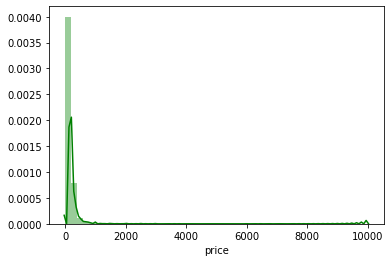

In [69]:
# lets look at price column
sns.distplot(df_org.price,color='g',kde=True)
plt.show()

In [70]:
df_org.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [71]:
df_org.price.skew()

19.118938995046033

The price column in the dataframe has a long tail . If we look at the descriptive stat of the column,the positive skew is evident (mean > median and skew is 19.11) 

**Features**

For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365'
Select only them.

In [72]:
select_columns =['latitude','longitude','price','minimum_nights','number_of_reviews',
                 'reviews_per_month','calculated_host_listings_count','availability_365']

In [73]:
df = df_org[select_columns]

In [74]:
df.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [75]:
df.shape

(48895, 8)

**Question 1**

Find a feature with missing values. How many missing values does it have?

In [76]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [77]:
print('The % of missing value in {} is {} %'.format('reviews_per_month',(df['reviews_per_month'].isnull().sum()*100/df.shape[0])))

The % of missing value in reviews_per_month is 20.55833929849678 %


reviews_per_month columns has 10052 missing values. We can see that almost 21 % of data in this column is missing 

**Question 2**

What's the median (50% percentile) for variable 'minimum_nights'?

In [78]:
df['minimum_nights'].median()

3.0

**Split the data**

Shuffle the initial dataset, use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Make sure that the target value ('price') is not in your dataframe.

Apply the log transformation to the price variable using the np.log1p() function.

In [79]:
# shuffle the DataFrame rows

df1 = df.copy() #make a copy of dataframe 
df1 = df1.sample(frac = 1,random_state=42) #shuffle with random_state=42
  
# print the shuffled DataFrame
print("\nShuffled DataFrame:")
df1.head()


Shuffled DataFrame:


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


we can see that index values have been shuffled

In [80]:
#initilasing length of train,val,test wrt length of df
n = len(df)

n_valid = int(n*0.2)
n_test = int(n*0.2)
n_train = n-(n_valid+n_test)

In [81]:
n,n_train,n_valid,n_test #length of full,train,val and test dataset

(48895, 29337, 9779, 9779)

In [82]:
# splitting dataframe by row index 60% 20% 20%
df_train = df1.iloc[:n_train,:].reset_index(drop=True)
df_valid = df1.iloc[n_train:(n_train+n_valid),:].reset_index(drop=True)
df_test = df1.iloc[(n_train+n_valid):n,:].reset_index(drop=True)
print("Shape of train-validation-test dataframes post splitting - {} , {} , {}".format(df_train.shape, df_valid.shape,df_test.shape))

Shape of train-validation-test dataframes post splitting - (29337, 8) , (9779, 8) , (9779, 8)


In [83]:
# assigning X(features) and target(y)
X_train = df_train.drop('price',axis='columns')
y_train = df_train['price']
X_valid = df_valid.drop('price',axis='columns')
y_valid = df_valid['price']
X_test = df_test.drop('price',axis='columns')
y_test = df_test['price']


In [84]:
#applying log transformation Calculates log(1 + x)
y_train = np.log1p(y_train) 
y_valid = np.log1p(y_valid)
y_test = np.log1p(y_test)

**Question 3**

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lesssons.

For computing the mean, use the training only!

Compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

#### OPTION 1 FILL NA WITH 0 AND ESTIMATE RMASE

In [85]:
X_train_0 = X_train.copy() #create a copy of X and y for code manipulation
X_val_0 = X_valid.copy()
X_test_0 = X_test.copy()
y_train_0 = y_train.copy()
y_val_0 = y_valid.copy()
y_test_0 = y_test.copy()

In [86]:
X_train_0.isnull().sum() #look at null values

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [87]:
# fillna with 0
X_train_0.fillna(0,axis='columns',inplace=True)
X_val_0.fillna(0,axis='columns',inplace=True)
X_test_0.fillna(0,axis='columns',inplace=True)


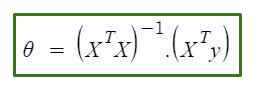

In [88]:
# function to train for Linear Regression using Normal Equation
def train_linear_regression(X,y):
    ''' The function takes X and y and returns bias Wo and weight matrix w using Normal equation'''
    ones = np.ones(X.shape[0])
    X= np.column_stack([ones,X]) # first columns is ones to multiply with bias term wo
    X_T_X = X.T@X
    X_T_X_inv = np.linalg.inv(X_T_X)
    W_full = X_T_X_inv@(X.T)@y
    
    return (W_full[0],W_full[1:])
    

In [89]:
# function to estimate RMSE 
def rmse(y_true,y_preds):
    '''The function take true and predicted value and returns RMSE'''
    error_square_mean = ((y_true - y_preds)**2).mean()
    return error_square_mean**0.5

In [90]:
#converting to np arrays
X_train_0 = X_train_0.values
y_train_0 = np.array(y_train_0)
X_val_0 = X_val_0.values
yval_0 = np.array(y_val_0)

In [91]:
wo , w = train_linear_regression(X_train_0,y_train_0)
y_pred_0 = wo+np.matmul(X_val_0,w)
print('RMSE for LInear Regression with fillna as 0 is {}'.format(round(rmse(y_val_0,y_pred_0),2)))

RMSE for LInear Regression with fillna as 0 is 0.64


### OPTION 2 FILL NA VALUES WITH MEAN OF COLUMN(USING TRG SET MEAN VALUES)

In [92]:
X_train_mean = X_train.copy() #create a copy of X and y for code manipulation
X_val_mean = X_valid.copy()
X_test_mean = X_test.copy()
y_train_mean = y_train.copy()
y_val_mean = y_valid.copy()
y_test_mean = y_test.copy()

In [93]:
X_train_mean.isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [94]:
# option 2 fillna with mean of trg set
fill_value = X_train['reviews_per_month'].mean()
X_train_mean.fillna(fill_value,axis='columns',inplace=True)
X_val_mean.fillna(fill_value,axis='columns',inplace=True)
X_test_mean.fillna(fill_value,axis='columns',inplace=True)


In [95]:
#converting to np arrays
X_train_mean = X_train_mean.values
y_train_mean = np.array(y_train_mean)
X_val_mean = X_val_mean.values
yval_mean = np.array(y_val_mean)

In [96]:
#train the model and estimate RMSE
wo , w = train_linear_regression(X_train_mean,y_train_mean)
y_pred_mean = wo+np.matmul(X_val_mean,w)
print('RMSE for LInear Regression with fillna as Mean is {}'.format(round(rmse(y_val_mean,y_pred_mean),2)))

RMSE for LInear Regression with fillna as Mean is 0.64


## Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [97]:
#fill na with 0
X_train.fillna(0,axis='columns',inplace=True)
X_valid.fillna(0,axis='columns',inplace=True)
X_test.fillna(0,axis='columns',inplace=True)


In [98]:
X_train = X_train.values
y_train = np.array(y_train)
X_valid = X_valid.values
y_valid = np.array(y_valid)

In [99]:
#function for training with regularsiation 
def train_linear_regression_reg(X,y,r):
    ones = np.ones(X.shape[0])
    X= np.column_stack([ones,X]) # first columns is ones to multiply with bias term wo
    X_T_X = X.T@X
    X_T_X = X_T_X + r *np.eye(X_T_X.shape[0]) #regularisation
    
    X_T_X_inv = np.linalg.inv(X_T_X)
    W_full = X_T_X_inv@(X.T)@y
    
    return (W_full[0],W_full[1:])
    

In [100]:
reg_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [101]:
for r in reg_values:
    wo, w = train_linear_regression_reg(X_train,y_train,r=r)
    y_pred_reg = wo+np.matmul(X_valid,w)
    print('RMSE for validation dataset for r={} is {}'.format(r,round(rmse(y_valid,y_pred_reg),2)))

RMSE for validation dataset for r=0 is 0.64
RMSE for validation dataset for r=1e-06 is 0.64
RMSE for validation dataset for r=0.0001 is 0.64
RMSE for validation dataset for r=0.001 is 0.64
RMSE for validation dataset for r=0.01 is 0.66
RMSE for validation dataset for r=0.1 is 0.68
RMSE for validation dataset for r=1 is 0.68
RMSE for validation dataset for r=5 is 0.68
RMSE for validation dataset for r=10 is 0.68


### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [102]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [103]:
score_list =[]
#initilasing length of train,val,test wrt length of df
n = len(df)
n_valid = int(n*0.2)
n_test = int(n*0.2)
n_train = n-(n_valid+n_test)

for seed in seed_values:
    df2 = df.copy() #make a copy of dataframe 
    df2 = df2.sample(frac = 1,random_state=seed) #shuffle with random_state=seed
    # splitting dataframe by row index 60% 20% 20%
    df_train_2 = df2.iloc[:n_train,:].reset_index(drop=True)
    df_valid_2 = df2.iloc[n_train:(n_train+n_valid),:].reset_index(drop=True)
    df_test_2 = df2.iloc[(n_train+n_valid):n,:].reset_index(drop=True)
    
    #assign X and y
    # assigning X(features) and target(y)
    X_train_2 = df_train_2.drop('price',axis='columns')
    y_train_2 = df_train_2['price']
    X_valid_2 = df_valid_2.drop('price',axis='columns')
    y_valid_2 = df_valid_2['price']
    X_test_2 = df_test_2.drop('price',axis='columns')
    y_test_2 = df_test_2['price']
    
    #taking log of y
    y_train_2 = np.log1p(y_train_2) 
    y_valid_2 = np.log1p(y_valid_2)
    y_test_2 = np.log1p(y_test_2)
    
    # fill na with o
    X_train_2.fillna(0,axis='columns',inplace=True)
    X_valid_2.fillna(0,axis='columns',inplace=True)
    X_test_2.fillna(0,axis='columns',inplace=True)

    # converting to np array
    X_train_2 = X_train_2.values
    y_train_2 = np.array(y_train_2)
    X_valid_2 = X_valid_2.values
    y_valid_2 = np.array(y_valid_2)
    
    #train the model and estimate RMSE
    wo , w = train_linear_regression(X_train_2,y_train_2)
    y_pred_2 = wo+np.matmul(X_valid_2,w)
    score_list.append(rmse(y_valid_2,y_pred_2))


In [104]:
std_dev_score = round(np.std(score_list),3)
print(f'Standard deviation of RMSE scores is {std_dev_score}')

Standard deviation of RMSE scores is 0.008


## Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Train a model with r=0.001.

What's the RMSE on the test dataset?

In [105]:
df3 = df.copy() #make a copy of dataframe 
df3 = df2.sample(frac = 1,random_state=9) #shuffle with random_state=seed
# splitting dataframe by row index 60% 20% 20%
df_train_3 = df3.iloc[:n_train,:].reset_index(drop=True)
df_valid_3 = df3.iloc[n_train:(n_train+n_valid),:].reset_index(drop=True)
df_test_3 = df3.iloc[(n_train+n_valid):n,:].reset_index(drop=True)
    

In [106]:
df_train_full = pd.concat([df_train_3,df_valid_3])

In [107]:
df_train_full.shape

(39116, 8)

In [108]:
#assigning X and y 
X_train_full = df_train_3.drop('price',axis='columns')
y_train_full = df_train_3['price']
X_test_3 = df_test_3.drop('price',axis='columns')
y_test_3 = df_test_3['price']

In [109]:
#taking log of y
y_train_full = np.log1p(y_train_full) 
y_test_3 = np.log1p(y_test_3)

In [110]:
# fill na with o
X_train_full.fillna(0,axis='columns',inplace=True)
X_test_3.fillna(0,axis='columns',inplace=True)


In [111]:
# converting to np array
X_train_full = X_train_full.values
y_train_full = np.array(y_train_full)
X_test_3 = X_test_3.values
y_test_3 = np.array(y_test_3)

In [112]:
#train the model and use on test set
r=0.001
wo, w = train_linear_regression_reg(X_train,y_train,r=r)
y_pred_test = wo+np.matmul(X_test_3,w)

In [113]:
print('RMSE for test dataset with r={} is {}'.format(r,round(rmse(y_test_3,y_pred_test),4)))

RMSE for test dataset with r=0.001 is 0.6546
